In [ ]:
!pip install contractions inflect wordcloud

In [23]:
import pandas as pd
import numpy as np

import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')

import re, string, unicodedata

import contractions

import inflect

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [14]:
df = pd.read_csv('/content/drive/MyDrive/Eluvio_DS_Challenge.csv')

# Data Cleaning

In [17]:
def clean_text(s):
    """
        This function cleans the text a bit
        :param s: string
        :return: cleaned string
    """
    # split by all whitespaces
    s = s.split()

    # join tokens by single space
    # why we do this?
    # this will remove all kinds of weird space
    # "hi. how are you" becomes
    # "hi. how are you"
    s = " ".join(s)

    # remove all punctuations using regex and string module
    s = re.sub(f'[{re.escape(string.punctuation)}]', '', s)

    # you can add more cleaning here if you want
    # and then return the cleaned string
    return s

def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

def remove_URL(sample):
    """Remove URLs from a sample string"""
    return re.sub(r"http\S+", "", sample)

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words.split():
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords.words('english'):
            new_words.append(word)
    return new_words

def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = replace_numbers(words)
    words = remove_stopwords(words)
    words = lemmatize_verbs(words)
    return words

def preprocess(sample):
    sample = remove_URL(sample)
    # sample = replace_contractions(sample)
    # Tokenize
#     words = nltk.word_tokenize(sample)
    
    # Normalize
    return normalize(sample)
    
def remove(text):
    return str(text).replace('[','').replace(']','').replace(',','').replace('\'','')    
    
df['title'] = df['title'].apply(lambda x: preprocess(x))
df['title'] = df['title'].apply(lambda x: str(remove(x)))

In [21]:
df

,time_created,date_created,up_votes,down_votes,title,over_18,author,category
0,1201232046,2008-01-25,3,0,score kill pakistan clash,False,polar,worldnews
1,1201232075,2008-01-25,2,0,japan resume refuel mission,False,polar,worldnews
2,1201232523,2008-01-25,3,0,us press egypt gaza border,False,polar,worldnews
3,1201233290,2008-01-25,1,0,jumpstart economy give health care,False,fadi420,worldnews
4,1201274720,2008-01-25,4,0,council europe bash euun terror blacklist,False,mhermans,worldnews
...,...,...,...,...,...,...,...,...
509231,1479816764,2016-11-22,5,0,heil trump donald trump altright white nationa...,False,nonamenoglory,worldnews
509232,1479816772,2016-11-22,1,0,people speculate could madeleine mccann,False,SummerRay,worldnews
509233,1479817056,2016-11-22,1,0,professor receive arab researchers award,False,AUSharjah,worldnews
509234,1479817157,2016-11-22,1,0,nigel farage attack response trump ambassador ...,False,smilyflower,worldnews


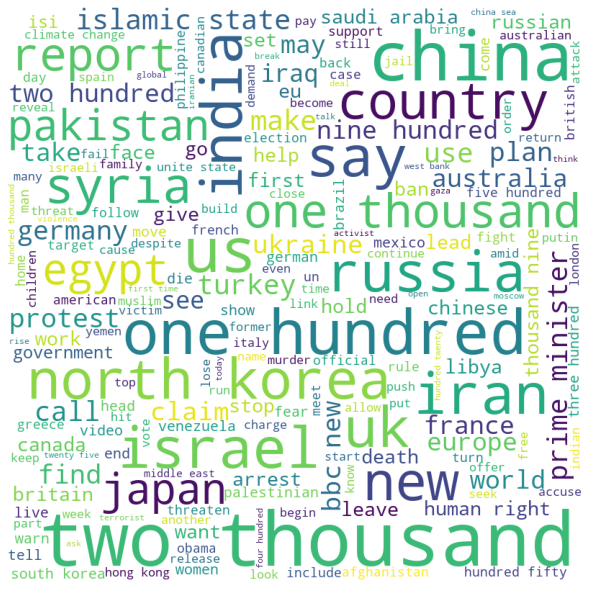

In [25]:
comment_words = ''

for val in df.title:
      
    # typecaste each val to string
    val = str(val)
  
    # split the value
    tokens = val.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

In [26]:
df.to_csv('/content/drive/MyDrive/Clean_Dataset.csv',index=False)